# Clustering
You will be asked to implement several functions.Team work is not allowed. 

Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

If you use any code fragments found on the Internet, make sure you reference them properly.

In this exercise we will use unsupervised methods for clustering, in this case instead of having $X$ and $Y$ pairs at train time, we only have the input data $X$ at train time.

Let's work with 2 popular methods: K-means and Mean-shift.

## Dataset
To get familiar with the adavantages and disanvantages of the methods, we will use 3 different datasets:

1. toy data (2-dimensional blob data that is easy to visualize) for warm up.

2. 2d spiral data

3. country data including some socio-economic and health factors that can jointly determine the overall development of the country. We will use K-means and mean-shift methods on this dataset to make decision to choose the countries that are in the direst need of aid.


## Objectives
1. Learn to cluster data by kmeans and mean-shift approaches provided by scikit-learn library.
2. Understand how to evaluate them by intuition and metric values

## Contents:
1) scikit-learn K-means (3 points)

    1a) Toy dataset: blobs

    1b) Toy dataset: spirals
    

2) scikit-learn Mean-shift (3 points)

    2a) Toy dataset: blobs

    2b) Toy dataset: spirals
    

3) Country dataset (6 points)


4) Your own Mean-shift implementation (will be graded in lab 6 but this task is more difficult therefore you can already have a look at it this week)


## 1) sklearn K-means (3 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline 

### 1a) Toy dataset: blobs (1 point)
- Load toy dataset (blobs).

In [34]:
data_blobs = np.genfromtxt('/Users/tunayildiz/MachineLearningforSciences/Datasets/toy_data.csv', delimiter=',')

In [24]:
#Explore

print(data_blobs.shape)
print(data_blobs[0:5])

(1000, 2)
[[ 11.40984207   5.58112073]
 [ -4.34272757  11.08027991]
 [ 12.19338509   4.41690355]
 [-12.35698204   4.60251408]
 [ 14.04581614   3.82670146]]


- Use sklearn kmeans function (parameters by defalt) to cluster points.

In [25]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data_blobs = scaler.fit_transform(data_blobs)

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5, init='k-means++')

y_kmeans = kmeans.fit_predict(data_blobs)

- Plot clustering results by ```plt.scatter()``` color the points according to the clusters from k-means

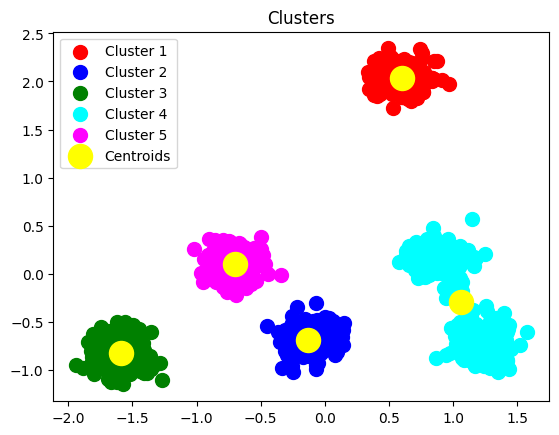

In [27]:
plt.scatter(data_blobs[y_kmeans == 0, 0], data_blobs[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_blobs[y_kmeans == 1, 0], data_blobs[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_blobs[y_kmeans == 2, 0], data_blobs[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_blobs[y_kmeans == 3, 0], data_blobs[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_blobs[y_kmeans == 4, 0], data_blobs[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

- Choosing the number of n_clusters without extra information is not trivial. For these blobs data, we don't have any labels. Which configurations do you think are be the best for this dataset? How many n_custers would you choose?
- Plot your results.

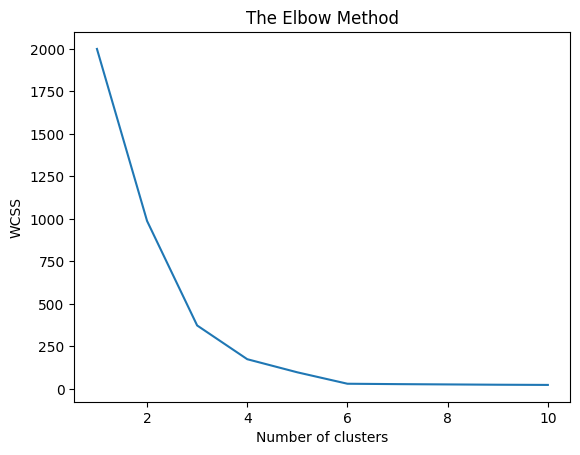

In [9]:
''' 
Just by looking at the graph above, it is clear that n_cluster needs to be 5 or 6. However, to determine in a more accurate fashion, elbow method could be used.
'''
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_blobs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




As the graph above suggests, 5 or 6 clusters is a good fit for n_clusters.

### 1b) Spiral dataset (1 point)
- Try to use the KMeans to cluster the Spiral dataset.

In [10]:
# load data
spiral = np.load("/Users/tunayildiz/MachineLearningforSciences/Datasets/spiral.npz")['x']


In [11]:
print(spiral.shape)
print(spiral[0:5])

(312, 2)
[[1.72  1.195]
 [1.16  1.525]
 [0.865 1.93 ]
 [2.32  3.045]
 [3.125 2.13 ]]


- Use sklearn kmeans to cluster points.
- Plot your results

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5, init='k-means++')

y_kmeans = kmeans.fit_predict(spiral)

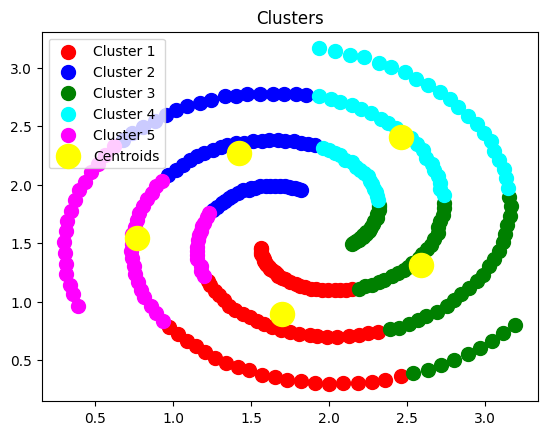

In [13]:
plt.scatter(spiral[y_kmeans == 0, 0], spiral[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(spiral[y_kmeans == 1, 0], spiral[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(spiral[y_kmeans == 2, 0], spiral[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(spiral[y_kmeans == 3, 0], spiral[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(spiral[y_kmeans == 4, 0], spiral[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

### Question (1 point)
- Does it work? Please explain your answer, which assumptions required for kmeans? 
- What limitations do you think K-means would have?
- Can you find a k-means solution for this dataset? Write down your ideas here

1. The problem about spiral dataset is that the clusters can be squeezed together or distinguished from each other dependent on the n_cluster because it is harder to predict where does one class start and end unlike the blobs in the first question. Elbow method can be used again to get a better perspective on finding a sensible n_clusters but it is still hard to interpret with bare eyes. Kmeans assumes that the variance of the distribution of each value is the same and in a spherical manner.

2. Kmeans struggles when the clustered data has different size and densities. Outliers play a significant role since they affect the shifts of the centroids.

3. As mentioned before, elbow method can be used and kmeans++ can be used for initialization since it generally a good method to figure out different classes. It simply recursively looks at the furthest point and assigns a centroid so the distances of the clusters are succesfully found.

### Optional: Try your ideas to find a solution for this dataset
Keep your unsuccsessful ideas as well and try to keep your code as clean as possible

## 2) sklearn mean-shift (3 points)

In [14]:
from sklearn.cluster import MeanShift

### 2a) Toy dataset: blobs (1 point)

- Use sklearn meanshift function to cluster points.

In [52]:
mshift = MeanShift(bandwidth=2)

y_kmeans = mshift.fit_predict(data_blobs)

- Plot clustering results 

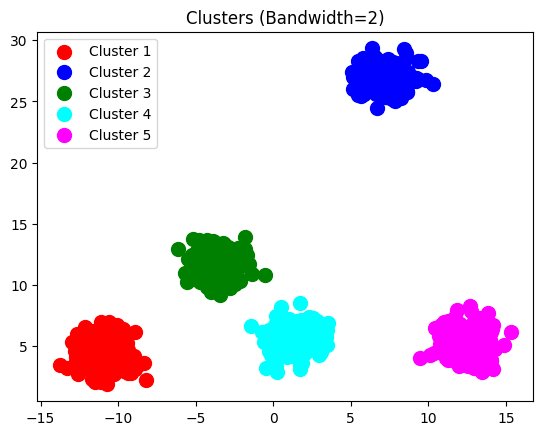

In [53]:
plt.scatter(data_blobs[y_kmeans == 0, 0], data_blobs[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_blobs[y_kmeans == 1, 0], data_blobs[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_blobs[y_kmeans == 2, 0], data_blobs[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_blobs[y_kmeans == 3, 0], data_blobs[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_blobs[y_kmeans == 4, 0], data_blobs[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters (Bandwidth=2)')
plt.legend()
plt.show()

- Try different hyper-parameters (i.e. bandwidth, which is an important parameter for mean-shift) and plot the results.

In [50]:
mshift = MeanShift(bandwidth=4)

y_kmeans = mshift.fit_predict(data_blobs)

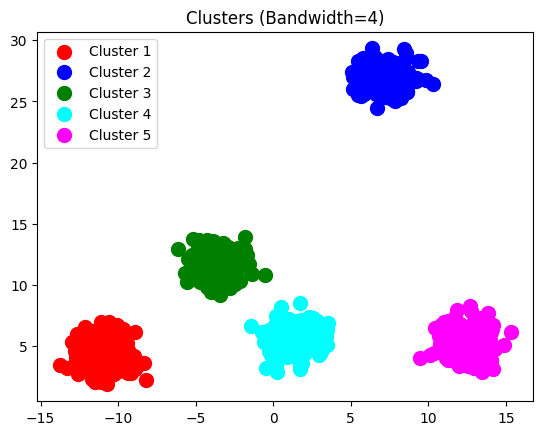

In [51]:
plt.scatter(data_blobs[y_kmeans == 0, 0], data_blobs[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_blobs[y_kmeans == 1, 0], data_blobs[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_blobs[y_kmeans == 2, 0], data_blobs[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_blobs[y_kmeans == 3, 0], data_blobs[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_blobs[y_kmeans == 4, 0], data_blobs[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters (Bandwidth=4)')
plt.legend()
plt.show()

### 2b) Toy dataset: spiral (1 point)

- Use the Mean-shift to cluster the Spiral dataset.
- Plot the results.

In [54]:
mshift = MeanShift(bandwidth=2)

y_kmeans = mshift.fit_predict(spiral)

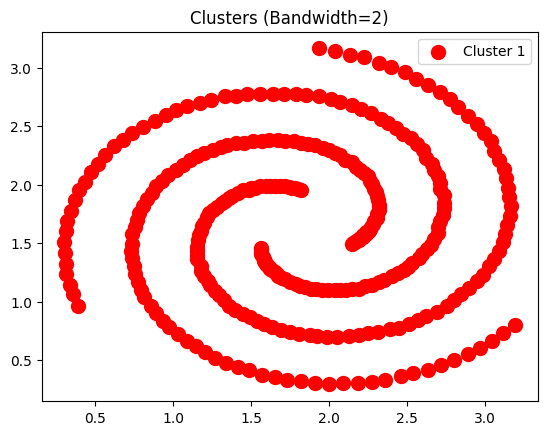

In [55]:
plt.scatter(spiral[y_kmeans == 0, 0], spiral[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.title('Clusters (Bandwidth=2)')
plt.legend()
plt.show()

### Question (1 point)
- Does it work?
- What kind of data cluster is this approach better at discovering?
- Do you have a solution for this dataset? Write down what you would try

1. The model shown above was showing that the model only consisted of a single cluster which is wrong. Mean shift algorithm does not work well when the clusters changes very rapidly. Mean shift was successfull in the first model where there were significant distances between clusters compared to the spiral model where data points are sticked together and close in terms of their distances.
2. Mean shift is good at datasets where it has outliers and has different sizes and densities of clusters. It also does not require the user to put how many cluster the model should have.
3. Regular KMeans with elbow method is much more sensible in a spiral dataset.

### Optional: Try your ideas to find a solution for this dataset
Keep your unsuccsessful ideas as well and try to keep your code as clean as possible

## Country development dataset (6 points)

country data including some socio-economic and health factors that can jointly determine the overall development of the country. We will use K-means and mean-shift methods on this dataset to make decision to choose the countries that are in the direst need of aid.

### Data Dictionary
- country = Name of the country
- child_mort = Death of children under 5 years of age per 1000 live births
- exports = Exports of goods and services. Given as %age of the Total GDP
- health = Total health spending as %age of Total GDP
- imports = Imports of goods and services. Given as %age of the Total GDP
- income = Net income per person
- inflation = The measurement of the annual growth rate of the Total GDP
- life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population

### Data Investigation (1 point)

In [56]:
# Load data
df_country=pd.read_csv('/Users/tunayildiz/MachineLearningforSciences/Datasets/country_data.csv')

- Print the first few lines of your data
- Print the types of your colums
- Print the shape of your dataframe
- Print the basic statistics of the dataset

In [57]:
df_country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [58]:
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

- Visualize the distribution of each feature (plot 9 figures)

In [59]:
df_country.shape

(167, 10)

In [64]:
df_country.describe().transpose

<bound method DataFrame.transpose of        child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000  

### KMeans clustering health factors (1 point)
- Cluster the samples based on health factors(child_mort, life_expec, total_fer)
- Print the result (e.g. cluster: 0: [list of countries], cluster 1:[list of countries] ...)
- Don't forget to normalise your data
- Use the provided visualise functon to plot a 3d graph of your resulsts

In [ ]:
def visualise(data, idx):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data.values[:,0],data.values[:,1],data.values[:,2],marker='.', c=idx)
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    ax.set_zlabel(data.columns[2])  
    plt.show()

In [ ]:
visualise(X_health, y_kmeans_health)

### Cluster based on economic attributes (0.5 points)
- Cluster the samples based on economic factors('income', 'gdpp', 'health')
- Print the result (e.g. cluster: 0: [list of countries], cluster 1:[list of countries] ...)
- Don't forget to normalise your data
- Use the provided visualise functon to plot a 3d graph of your resulsts

### Cluster KMeans based on all attributes (0.5 points)
- Cluster the samples based on all attributes
- Print the result (e.g. cluster: 0: [list of countries], cluster 1:[list of countries] ...)
- Don't forget to normalise your data

### Question:  (1 point)
Which feature set would you prefere and why? Do you think k-means clustering works well for this dataset?

### Mean shift clustering (1 point)
- Cluster the samples based on all attributes using mean shift
- Print the result (e.g. cluster: 0: [list of countries], cluster 1:[list of countries] ...)
- Don't forget to normalise your data

### Question (1 poins):
 Which method would you use to decide which countries need aid? Explain your choice and why this algorithm might worked better

## 3) Your own Mean-shift implementation (0 points)
### (Will be graded in lab 6 but is more time consuming therefore you can already start this week)

Let's implement mean-shift algorithm ourselves.

Complete the function ml_meanshift that performs the mean shift algorithm. The function takes 3 arguments:

- input data: sample points in a N-by-2 matrix (number of rows is the number of samples, dimensionality of the input data will always be 2 for this exercise)
- the kernel bandwidth $h$
- the stopping threshold $\vartheta$

It should return two values:

- cluster indexes: a column vector with N rows, specifying the cluster index for each sample
- cluster modes: a M-by-2 matrix, returning the cluster modes (the points with the highest density) for each cluster (where M is the number of clusters)

For this task, use the Epanechnikov kernel. Luckily all terms before the sum cancel out in the mean shift formula, leading to

$$
\mathbf{q}_{t+1} = \frac{
\sum_{i=1}^N \mathbf{x}_i
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}i|^2}{h^2} \right)
} {
\sum_{i=1}^N
\max\left(0, 1 - \frac{|\mathbf{q}_t - \mathbf{x}_i|^2}{h^2} \right)
}
$$

Start the mean shift procedure at each point and iterate until $|\mathbf{q}_{t}-\mathbf{q}_{t-1}| < \vartheta$ where $\vartheta$ is the threshold passed to the function. Additionally also count the iterations and add it as condtion so the loop does not run infinitely. You can use $200$ as the maximum value of iteration.

When the iteration stopped, decide if a cluster mode already exists that is closer than $\frac{h}{5}$. If yes, assign the point that you started at to this cluster. Otherwise, create a new cluster and assign the point to the new cluster.

In [ ]:
import math
from numpy import linalg as la
import numpy.matlib

In [ ]:
# DO NOT MODIFY
def visualise_kmeans(data,idx,centers,updated=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[:,0],data[:,1],marker='.', c=idx)
    ax.plot(centers[:,0],centers[:,1],'+',color='r',markersize=15,mew=2)
    plt.show()
def test_meanshift():
    data = np.genfromtxt('data/toy_data.csv', delimiter=',')
    idx, centers = ml_meanshift(data,4,0.001)
    
    centers_2 = np.array(centers)
    
    visualise_kmeans(data=data,idx=idx,centers=centers_2)

In [ ]:
def ml_meanshift(data,h,theta):
    # ml_meanshift returns cluster indices and modes from computed with meanshift algorithm

    # initialization
    #initialize modes
    modes = 
    #initialize index variable for data points
    index = 
    #s = number of data points
    s = 

    #take i-th element as query point
    for i in range(s):
        #initialize starting q0 and q1 condition
        q1 = 
        q0 = 

        #iteration initilization
        it = 0

        while ():
            #update break criterion values

            #update iteration
            it = it+1

        #check for clusters in the vicinity
        #1st condition: if mode is not empty
        #2nd: if a cluster mode exists closer than h/5
        #else create a new cluster

    return index, modes

In [ ]:
# test and visualise your results
test_meanshift()